---

# <center>Classificação de Regiões Terrestres através de Imagens de Satélite e Deep Learning</center>

---

## 📌 1. Introdução

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">O planeta Terra é um mosaico complexo e vibrante de diferentes regiões, cada uma com suas próprias características únicas. Compreender essas regiões e suas interações é fundamental para uma variedade de aplicações, desde o monitoramento ambiental até a planejamento urbano.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Neste projeto, exploramos a aplicação de técnicas de Deep Learning para a classificação de diferentes tipos de regiões terrestres usando imagens de satélite. As imagens de satélite oferecem uma visão abrangente e objetiva da superfície da Terra, tornando-as uma ferramenta valiosa para este tipo de análise.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Utilizamos uma arquitetura de Rede Neural Convolucional (CNN) para o nosso modelo de Deep Learning, que é treinado com um conjunto diversificado de imagens de satélite. O modelo é então capaz de classificar novas imagens em várias categorias, identificando características como florestas, corpos d’água, áreas urbanas e muito mais.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Este projeto não só demonstra o poder do Deep Learning na análise e interpretação de imagens de satélite, mas também serve como um exemplo prático da aplicação dessas técnicas em um contexto do mundo real. Esperamos que este trabalho possa inspirar outros a explorar ainda mais as possibilidades oferecidas pelo Deep Learning na análise de imagens de satélite.</p>

## ⚙️ 2. Configurações de Ambiente 

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Antes de começarmos a construir e treinar nossa rede neural, precisamos configurar nosso ambiente. Isso envolve várias etapas importantes que garantem que nosso código seja executado corretamente e nossos experimentos sejam reproduzíveis.</p>

### 2.1 Instalação e Carga de Pacotes

<div style="background-color: #f2f2f2; border-radius: 20px; margin: 10px; padding: 10px;">
<ul>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>os</strong>: Esta é uma biblioteca padrão do Python que fornece funções para interagir com o sistema operacional, incluindo a leitura de variáveis de ambiente, manipulação de diretórios e arquivos.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>warnings</strong>: Outra biblioteca padrão do Python usada para emitir avisos e controlar se eles são ignorados ou não.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>numpy</strong>: Uma biblioteca fundamental para a computação científica em Python. Ela fornece suporte para arrays multidimensionais, matrizes e uma grande coleção de funções matemáticas de alto nível.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>seaborn</strong> e <strong>matplotlib</strong>: São bibliotecas de visualização de dados em Python que fornecem uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>torchvision</strong>: Uma parte do ecossistema PyTorch, torchvision é usada para carregar e preparar conjuntos de dados de imagens, além de fornecer alguns modelos pré-treinados.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>torch</strong>: É uma biblioteca de aprendizado profundo de código aberto que fornece uma interface flexível e eficiente para algoritmos de aprendizado profundo e usa a biblioteca de matrizes Tensor do Google.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>torchmetrics</strong>: É uma biblioteca que fornece métricas para avaliação de modelos PyTorch, neste caso, a precisão da classificação.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>lightning</strong>: PyTorch Lightning é uma estrutura leve que organiza o código PyTorch, fornecendo abstração para treinamento, validação, teste e previsão enquanto mantém total controle e simplicidade.</p></li>
</ul>
</div>

In [1]:
# !pip install torch
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:0000:010:01


In [2]:
# Ambiente de desenvolvimento
import os
import shutil
import warnings

# Matemática
import numpy as np
import pandas as pd

# Visualização de dados
import seaborn as sns
from PIL import ImageOps
import matplotlib.pyplot as plt

# Pytorch
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

# Métricas de avaliação
from torchmetrics.classification import Accuracy

# Lightning
import lightning as pl
from lightning.pytorch import Trainer
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.callbacks import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint

# Torchvision
from torchvision import models
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, Pad, CenterCrop, ToTensor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Ignorando avisos desnecessários
warnings.filterwarnings("ignore")

### 2.2 Reprodutibilidade

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Para garantir a reprodutibilidade de nossos experimentos, é uma boa prática definir uma semente para o gerador de números aleatórios do <b>PyTorch</b>, <b>NumPy</b> e <b>Lightning</b>:</p>

In [4]:
def set_seed(seed=1996):
    
    # CPU
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
    # GPU
    if torch.cuda.is_available():
        pl.seed_everything(seed)
        torch.cuda.manual_seed_all(seed)
        
# Tornando os experimentos deterministicos
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
set_seed(seed=1996)

INFO: Seed set to 1996


### 2.3 Definindo o Dispositivo

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Dependendo de sua configuração, você pode querer treinar sua rede neural em uma <i>CPU</i> ou <i>GPU</i>. O PyTorch facilita a definição do dispositivo que queremos usar:</p>

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo disponível: {device}")

Dispositivo disponível: cuda


###  🐳 3. Carga e Pré-processamento das Imagens

### 3.1 Criando DataLoaders

In [6]:
class SquarePad:
    def __call__(self, image):
        w, h = image.size
        max_wh = np.max([w, h])
        hp = int((max_wh - w) / 2)
        vp = int((max_wh - h) / 2)
        padding = (hp, vp, hp, vp)
        return ImageOps.expand(image, padding)

In [7]:
class GetDataLoaders(object):
    
    # Método construtor
    def __init__(self):
        self.URL         = "/kaggle/input/satellite-image-classification/data"
        self.BATCH_SIZE  = 126 if torch.cuda.is_available() else 64
        self.NUM_WORKERS = int(os.cpu_count()/2)
        self.CLASSES     = os.listdir("/kaggle/input/satellite-image-classification/data")
        
    # Cria pastas se ainda não existe
    def create_paste(self):
        for classe in self.CLASSES:
            os.makedirs(f"dados/train/{classe}")
            os.makedirs(f"dados/valid/{classe}")
            os.makedirs(f"dados/test/{classe}")
            
    # Copia imagens para treino, validação e teste
    def copy_images(self):
        
        # Verifica se não já foram copiadas as imagens
        if "dados" not in os.listdir():
        
            # Cria pastas com as respectivas classes se não existir
            self.create_paste()

            # Copiando as imagens por cada classe
            for classe in self.CLASSES:

                # Nomes das imagens
                allNames = [os.listdir(f"/kaggle/input/satellite-image-classification/data/{classe}")][0]
                np.random.shuffle(allNames)

                # Treino, Validação e Teste
                train_, valid_, test_ = np.split(np.array(allNames), [int(len(allNames) * 0.7), int(len(allNames) * 0.85)])

                # Urls 
                train_ = [f"/kaggle/input/satellite-image-classification/data/{classe}/" + name for name in train_.tolist()]
                valid_ = [f"/kaggle/input/satellite-image-classification/data/{classe}/" + name for name in valid_.tolist()]
                test_  = [f"/kaggle/input/satellite-image-classification/data/{classe}/" + name for name in test_.tolist()]

                # Copiando imagens para as pastas de treino, validação e teste
                for name in train_:
                    shutil.copy(name, f"/kaggle/working/dados/train/{classe}")

                for name in valid_:
                    shutil.copy(name, f"/kaggle/working/dados/valid/{classe}")

                for name in test_:
                    shutil.copy(name, f"/kaggle/working/dados/test/{classe}")
                    
    # Obtendo a média e desvio padrão das imagens
    def get_mean_and_std(self):

        # Criando pastas e copiando imagens se ainda não existem
        self.copy_images()

        # Tamanho desejado para a imagem
        desired_size = 256

        # Transformações
        transform = Compose([
            SquarePad(),
            Resize((desired_size, desired_size)),  # Redimensiona a menor dimensão para o tamanho desejado
            ToTensor()  # Converte a imagem para um tensor
        ])

        # Imagens de treino
        train_folder = ImageFolder(
            root="/kaggle/working/dados/train", 
            transform=transform
        )
        train_data = DataLoader(dataset=train_folder, batch_size=self.BATCH_SIZE, shuffle=True, num_workers=self.NUM_WORKERS)

        # Obtendo o número de canais de cores
        n_channels = next(iter(train_data))[0].size(1)

        # Tensores que receberão os valores da média e desvio padrão
        mean, std = torch.zeros(n_channels), torch.zeros(n_channels)

        # Cálculo da média e desvio padrão
        for inputs, targets in train_data:
            for i in range(n_channels):
                mean[i] += inputs[:, i, :, :].mean()
                std[i]  += inputs[:, i, :, :].std()
        mean.div_(len(train_data))
        std.div_(len(train_data))

        # Retornando os valores de média e desvio padrão
        return mean, std
    
    # Cria DataLoaders
    def creat_dataloaders(self):
        
        # Obtendo a média e desvio padrão das imagens
        mean, std = self.get_mean_and_std()
        
        # Criando transformadores
        # -= Treino =-
        train_transforms = Compose([
            transforms.Resize((100, 100)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
        
        # -= Validação de teste =-
        val_test_transforms = Compose([
            transforms.Resize((100, 100)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
        
        # DataLoaders treino, validação, teste
        train_folder = ImageFolder(root="/kaggle/working/dados/train", transform=train_transforms)
        train_data   = DataLoader(dataset=train_folder, batch_size=self.BATCH_SIZE, shuffle=True, num_workers=self.NUM_WORKERS)
        
        valid_folder = ImageFolder(root="/kaggle/working/dados/valid", transform=val_test_transforms)
        valid_data   = DataLoader(dataset=valid_folder, batch_size=self.BATCH_SIZE, shuffle=True, num_workers=self.NUM_WORKERS)

        test_folder  = ImageFolder(root="/kaggle/working/dados/test",  transform=val_test_transforms)
        test_data    = DataLoader(dataset=test_folder, batch_size=self.BATCH_SIZE, shuffle=True, num_workers=self.NUM_WORKERS)
        
        # Retornando DataLoaders
        return train_data, valid_data, test_data
        
# Carregando DataLoaders
train_data, valid_data, test_data = GetDataLoaders().creat_dataloaders()

### 3.2 Visualizando Imagens de Satélites

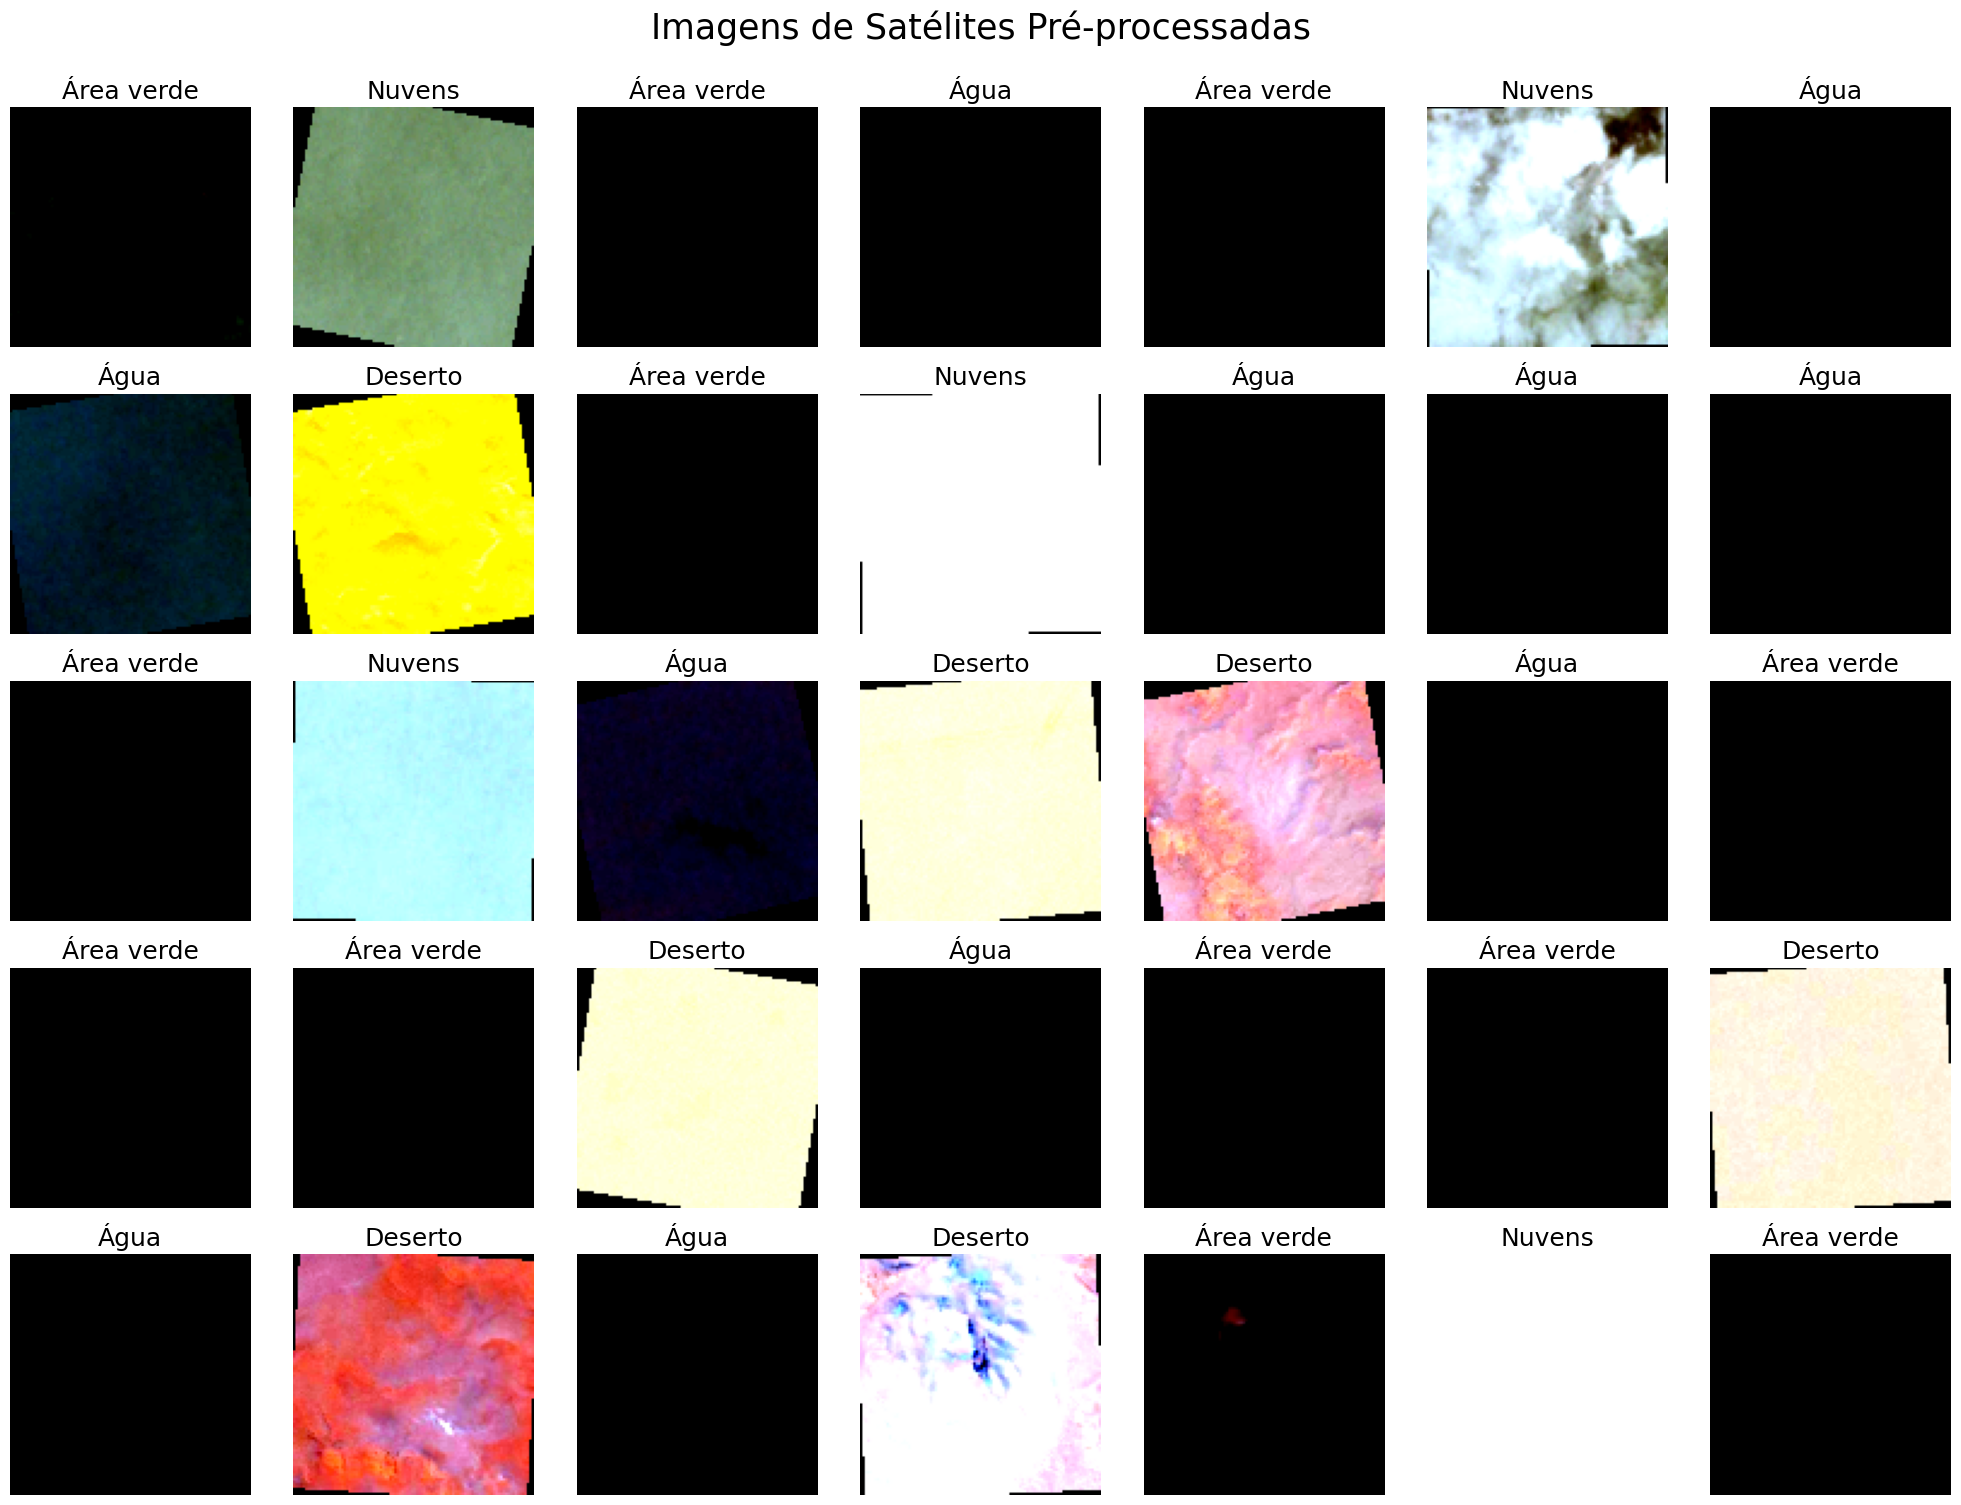

In [8]:
# Lista dos nomes das classes do seu conjunto de dados em inglês
classes = ['cloudy', 'desert', 'green_area', 'water']

# Dicionário de tradução
traducao = {'cloudy': 'Nuvens', 'desert': 'Deserto', 'green_area': 'Área verde', 'water': 'Água'}

# Carrega primeiro batch de imagens
images, labels = next(iter(train_data))

# Visualizando as primeiras imagens
fig, axes = plt.subplots(nrows=5, ncols=7, figsize=(20, 15))
fig.suptitle("Imagens de Satélites Pré-processadas", fontsize=25, y=1) 

for i, ax in enumerate(axes.flatten()):
    img = images[i].numpy()
    img = np.transpose(img, (1, 2, 0)) # Transpõe a imagem

    # Recorta os valores dos dados da imagem para o intervalo [0, 1]
    img = np.clip(img, 0, 1)

    ax.imshow(img)
    ax.set_title(traducao[classes[labels[i]]], size=18)  # Adiciona o título da imagem em português
    ax.axis("off")

plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajustar a distância vertical e horizontal entre as subtramas
plt.tight_layout()
plt.show()

### 3.3 Distribuição das Classes

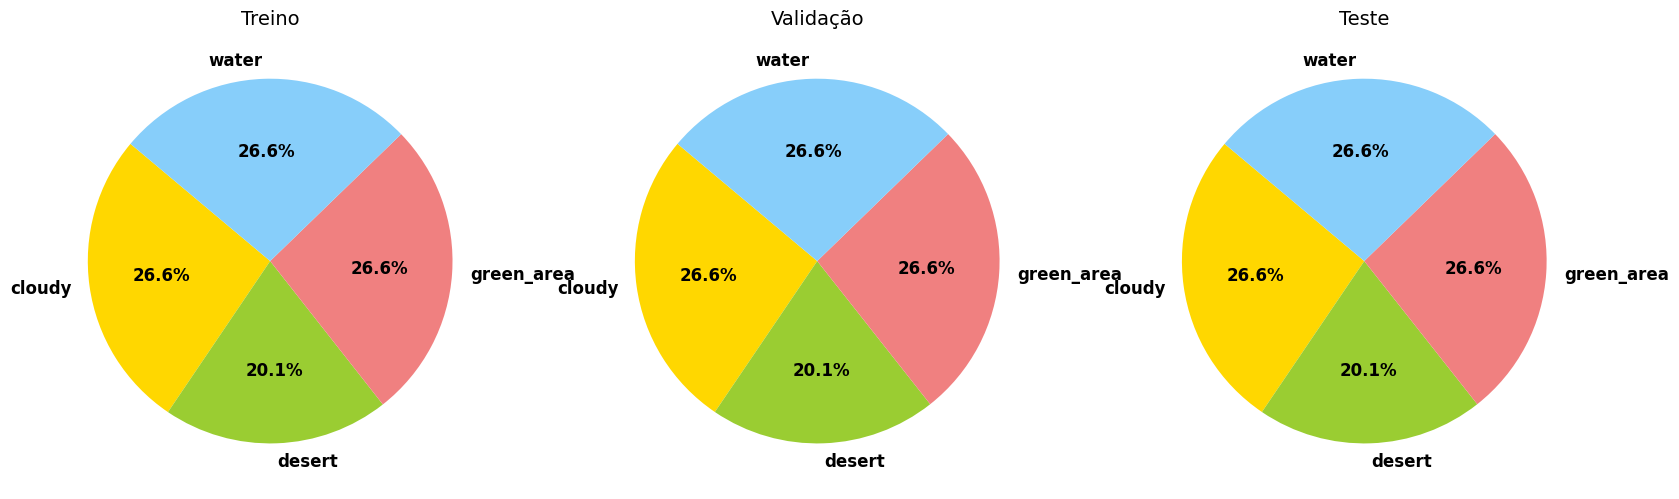

In [9]:
# Lista dos nomes das classes do seu conjunto de dados
classes = ['cloudy', 'desert', 'green_area', 'water']

# Conta o número de imagens em cada classe para cada conjunto
def count_images(root):
    counts = {classe: 0 for classe in classes}
    for classe in classes:
        counts[classe] = len(os.listdir(f"{root}/{classe}"))
    return counts

train_counts = count_images("dados/train")
valid_counts = count_images("dados/valid")
test_counts  = count_images("dados/test")

# Define cores personalizadas e explode para as fatias
colors  = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode a primeira fatia

# Cria os gráficos de pizza
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Define as propriedades do texto para negrito
textprops = {"fontsize": 12, "weight": "bold"}

axes[0].pie(train_counts.values(), labels=train_counts.keys(), colors=colors,
autopct='%1.1f%%', startangle=140, textprops=textprops)
axes[0].set_title("Treino", size=14)
axes[0].set_aspect('equal')  # Adiciona esta linha

axes[1].pie(valid_counts.values(), labels=valid_counts.keys(), colors=colors,
autopct='%1.1f%%', startangle=140, textprops=textprops)
axes[1].set_title("Validação", size=14)
axes[1].set_aspect('equal')  # Adiciona esta linha

axes[2].pie(test_counts.values(), labels=test_counts.keys(), colors=colors,
autopct='%1.1f%%', startangle=140, textprops=textprops)
axes[2].set_title("Teste", size=14)
axes[2].set_aspect('equal')  # Adiciona esta linha

plt.show()

## 🤖 4. Modelagem Com DenseNet121

<center><img src="https://i.ytimg.com/vi/wh-n-pTxMZU/maxresdefault.jpg" width=75%;></center>


### 4.1 Introdução à Arquitetura DenseNet121

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">
DenseNet, abreviação de Densely Connected Convolutional Networks, é uma arquitetura de rede neural inovadora que utiliza conexões densas entre as camadas para aprimorar o desempenho das redes neurais convolucionais. Essa arquitetura avançada tem demonstrado eficácia significativa em uma ampla gama de tarefas de visão computacional, como classificação de imagens, detecção de objetos e segmentação.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">A arquitetura DenseNet121 é uma variante específica da DenseNet que consiste em várias camadas convolucionais. Cada camada é seguida por uma operação de concatenação que combina a entrada de todas as camadas anteriores. Em resumo, a DenseNet121 é composta pelas seguintes camadas:</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">1 convolução 7x7</p>
- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">58 convoluções 3x3</p>
- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">61 convoluções 1x1</p>
- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">4 AvgPool</p>
- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">1 camada totalmente conectada</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Uma característica distintiva da DenseNet é que cada camada está diretamente conectada a todas as outras camadas. Portanto, para 'L' camadas, existem L (L+1)/2 conexões diretas. Isso contrasta com as redes neurais convencionais, onde cada camada está conectada apenas à próxima camada.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Outro componente importante da DenseNet são os DenseBlocks. A operação de concatenação não é viável quando o tamanho dos mapas de recursos muda. No entanto, uma parte essencial das CNNs é a redução de dimensionalidade das camadas, que reduz o tamanho dos mapas de recursos para obter velocidades de computação mais altas. Para permitir isso, as DenseNets são divididas em DenseBlocks, onde as dimensões dos mapas de recursos permanecem constantes dentro de um bloco, mas o número de filtros entre eles é alterado.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">: Huang, G., Liu, Z., Van Der Maaten, L., & Weinberger, K. Q. (2017). Densely connected convolutional networks. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 4700-4708).</p>

### 4.2 Carrega Modelo Pré-treinado

In [10]:
def load_densenet121(pretrained=True, activation="relu"):
    # Função auxiliar para substituir ReLU por ELU
    def replace_relu_with_elu(model):
        for child_name, child in model.named_children():
            if isinstance(child, nn.ReLU):
                setattr(model, child_name, nn.ELU())
            else:
                replace_relu_with_elu(child)

    # Função auxiliar para substituir ReLU por Sigmoid
    def replace_relu_with_sigmoid(model):
        for child_name, child in model.named_children():
            if isinstance(child, nn.ReLU):
                setattr(model, child_name, nn.Sigmoid())
            else:
                replace_relu_with_sigmoid(child)

    # Carga do modelo
    modelo = models.densenet121(pretrained=pretrained)
    
    # Habilita o ajuste fino de todas as camadas da rede
    for param in modelo.parameters():
        param.requires_grad = True
    
    # Escolhendo a função de ativação a ser usada
    if activation == "relu":
        # Adicionando uma nova camada de saída ao modelo DenseNet
        modelo.classifier = nn.Linear(in_features=1024, out_features=4, bias=True)
    elif activation == "elu":
        replace_relu_with_elu(modelo)
        modelo.classifier = nn.Linear(in_features=1024, out_features=4, bias=True)
    elif activation == "sigmoid":
        replace_relu_with_sigmoid(modelo)
        modelo.classifier = nn.Linear(in_features=1024, out_features=4, bias=True)
    elif activation == "tanh":
        modelo.classifier = nn.Linear(in_features=1024, out_features=4, bias=True)
    
    return modelo

### 4.3 Estrutura do DenseNet121

#### 4.3.1. Algoritmo de Otimização Adamax

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Adamax é uma variante do algoritmo de otimização Adam, que é baseado em estimativas adaptativas de momentos de ordem inferior. Enquanto Adam usa a média móvel exponencial do gradiente e do quadrado do gradiente para calcular as taxas de aprendizado adaptativas para cada parâmetro, Adamax usa a norma infinita dos gradientes passados para o cálculo da taxa de aprendizado.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Aqui estão as equações matemáticas que definem o algoritmo Adamax:</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Dado um gradiente $g_t$ no tempo $t$, o algoritmo Adamax atualiza os parâmetros $\theta$ da seguinte maneira:</p>

1. <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Atualiza a média móvel exponencial do gradiente:</p>

$$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$$

2. <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Atualiza a norma infinita dos gradientes passados:</p>

$$u_t = \max(\beta_2 u_{t-1}, |g_t|)$$

3. <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Atualiza os parâmetros:</p>

$$\theta_{t+1} = \theta_t - \frac{\eta}{u_t} m_t$$

##### Definições dos termos

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$\beta_1$: É o hiperparâmetro que controla a taxa de decaimento da média móvel exponencial do gradiente. Ele geralmente é definido como um valor próximo a 1 (por exemplo, 0.9).</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$\beta_2$: É o hiperparâmetro que controla a taxa de decaimento da norma infinita dos gradientes passados. Ele também é geralmente definido como um valor próximo a 1 (por exemplo, 0.999).</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$\eta$: É a taxa de aprendizado. Este é um hiperparâmetro que determina o tamanho do passo que o algoritmo dá em cada iteração.</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$m_t$: É a média móvel exponencial do gradiente no tempo $t$. Ela é calculada como uma média ponderada do gradiente atual e da média móvel exponencial anterior.</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$u_t$: É a norma infinita dos gradientes passados até o tempo $t$. Ela é calculada como o máximo entre a norma infinita anterior e o valor absoluto do gradiente atual.</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$g_t$: É o gradiente no tempo $t$. Ele é calculado a partir da função de perda.</p>

#### 4.3.2. Função de Perda Cross Entropy

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">A função de perda de entropia cruzada é uma função de perda amplamente utilizada em aprendizado de máquina, especialmente em problemas de classificação. Ela é usada para quantificar a diferença entre duas distribuições de probabilidade. A ideia principal por trás da entropia cruzada é medir o nível de dissimilaridade entre a distribuição de probabilidade prevista pelo modelo e a distribuição de probabilidade verdadeira.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Aqui estão as equações matemáticas que definem a função de perda de entropia cruzada:</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Dado um vetor de rótulos verdadeiros $y$ e um vetor de previsões $\hat{y}$, a função de perda de entropia cruzada $L$ é calculada da seguinte maneira:</p>

$$L = -\sum_{i} y_i \log(\hat{y}_i)$$

##### Definições dos termos

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$y_i$: É o i-ésimo elemento do vetor de rótulos verdadeiros. Em um problema de classificação multiclasse, $y_i$ é geralmente 1 para a classe correta e 0 para todas as outras classes.</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$\hat{y}_i$: É o i-ésimo elemento do vetor de previsões. Ele representa a probabilidade prevista da i-ésima classe.</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$\log(\hat{y}_i)$: É o logaritmo natural da probabilidade prevista da i-ésima classe. O logaritmo é usado para penalizar as previsões erradas.</p>

- <p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">$-\sum_{i} y_i \log(\hat{y}_i)$: É a soma dos produtos dos rótulos verdadeiros e dos logaritmos das previsões correspondentes. Esta soma é negativa porque queremos minimizar a função de perda.</p>

In [11]:
class ModeloDenseNet121(pl.LightningModule):
    
    # Método construtor
    def __init__(self):
        super(ModeloDenseNet121, self).__init__()
        self.model = load_densenet121(activation="relu")
        self.acc   = Accuracy(task="multiclass", num_classes=4).to(device)
        
    # Método forward
    def forward(self, x):
        return self.model(x)
    
    # Método de treinamento
    def training_step(self, batch, batch_idx):
        x, y   = batch
        logits = self(x)
        loss   = F.cross_entropy(logits, y)
        acc    = self.acc(logits, y)
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("train_acc",  acc,  on_step=False, on_epoch=True, prog_bar=True)
        return loss
    
    # Método de validação
    def validation_step(self, batch, batch_idx):
        x, y   = batch
        logits = self(x)
        loss   = F.cross_entropy(logits, y)
        acc    = self.acc(logits, y)
        self.log("valid_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("valid_acc",  acc,  on_step=False, on_epoch=True, prog_bar=True)
    
    # Método de teste
    def test_step(self, batch, batch_idx):
        x, y   = batch
        logits = self(x)
        loss   = F.cross_entropy(logits, y)
        acc    = self.acc(logits, y)
        self.log("test_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("test_acc",  acc,  on_step=False, on_epoch=True, prog_bar=True)
        
    # Método de configuração de otimização
    def configure_optimizers(self):
        
        # Otimizador
        optimizer = optim.Adamax(params=self.parameters(), lr=0.002, weight_decay=5e-4)
        
        # Lr Scheduler
        lr_scheduler = optim.lr_scheduler.StepLR(
            optimizer=optimizer, 
            step_size=10,  
        )
        
        # Retornando as configurações de otimização
        return {"optimizer": optimizer, "lr_scheduler": {"scheduler": lr_scheduler, "interval": "epoch"}}
    
# Instanciando a classe ModeloDenseNet121
modelo = ModeloDenseNet121()

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 184MB/s]


In [12]:
# Definindo o checkpoint callback
checkpoint_callback = ModelCheckpoint(
    dirpath="./best",
    filename="best_model",
    mode="max", 
    save_top_k=1,
    monitor="valid_acc",
    verbose=True
)

# Definindo o Early Stopping
early_stopy = EarlyStopping(
    monitor="valid_acc", 
    patience=3, 
    mode="max", 
)

# CSVLogger
csvlogger = CSVLogger(save_dir="./loggs")

### 4.4 Treinamento do DenseNet121

In [13]:
# Definindo o treinador
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,
    logger=csvlogger,
    callbacks=[checkpoint_callback, early_stopy],
    max_epochs=100
) 

INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs


In [14]:
# Iniciando o treinamento
trainer.fit(modelo, train_data, valid_data)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type               | Params
---------------------------------------------
0 | model | DenseNet           | 7.0 M 
1 | acc   | MulticlassAccuracy | 0     
---------------------------------------------
7.0 M     Trainable params
0         Non-trainable params
7.0 M     Total params
27.832    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 32: 'valid_acc' reached 0.93846 (best 0.93846), saving model to '/kaggle/working/best/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 64: 'valid_acc' reached 0.99408 (best 0.99408), saving model to '/kaggle/working/best/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 96: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 128: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 160: 'valid_acc' reached 0.99645 (best 0.99645), saving model to '/kaggle/working/best/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 192: 'valid_acc' reached 0.99763 (best 0.99763), saving model to '/kaggle/working/best/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 224: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 256: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 288: 'valid_acc' was not in top 1


### 4.5 Carregando e Salvando as Métricas de Treino e Validação

In [15]:
# Avaliando modelo com dados de teste
trainer.test(modelo, test_data)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9905325174331665     │
│         test_loss         │    0.03081493079662323    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.03081493079662323, 'test_acc': 0.9905325174331665}]

In [16]:
def load_and_process_metrics(trainer):
    # Carrega métricas de treinamento e validação
    metricas = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
    metricas.set_index('epoch', inplace=True)

    # Deletando os passos individuais
    del metricas["step"]; del metricas['test_loss']; del metricas['test_acc']

    # Removendo valores NaN
    df_val_loss_acc    = metricas[['valid_loss', 'valid_acc']].dropna()
    df_train_loss_acc  = metricas[['train_loss', 'train_acc']].dropna()

    # Concatenando os dataframes
    metricas = df_train_loss_acc.join(df_val_loss_acc)
    
    return metricas

# Carregando as métricas de treino e validação por época
metricas = load_and_process_metrics(trainer)

# Salvando arquivo csv com as métricas de validação
metricas.to_csv('metricas.csv', index=False)

## 🍀 5. Avaliação do Modelo